# REDDY

Load modules and initialize objects

**NOTE:** `credentials.py` containing your `client_id` and `secret` is required to access Reddit API

In [1]:
from datetime import datetime, timedelta
from progressbar import ProgressBar, SimpleProgress, ETA
from modules.reddit_api import RedditAPI
from modules.cache import Cache
from modules.plotters import plot_submission_frequency_histogram
from credentials import client_id, secret

api   = RedditAPI()
cache = Cache(verbose=False)

api.authenticate(client_id, secret)

Download the posts and index them

In [2]:
# name of the subreddit to analyse
subreddit_name = "datascience"

after = None
count = 0
pbar = ProgressBar(widgets=[SimpleProgress(), ', ', ETA(), "\n"])
iterations = pbar(range(10))

for i in iterations:
    posts, before, after = api.new_posts(subreddit_name, limit=100, after=after, count=count)
    count += len(posts)
    cache.add(posts, overwrite=False)

cache.update_all_indices()

0 of 10, ETA:  --:--:--
1 of 10, ETA:  0:00:11                                 
2 of 10, ETA:  0:00:10                                  
3 of 10, ETA:  0:00:09                                  
4 of 10, ETA:  0:00:08                                  
5 of 10, ETA:  0:00:06                                  
6 of 10, ETA:  0:00:05                                  
7 of 10, ETA:  0:00:03                                  
8 of 10, ETA:  0:00:02                                  
9 of 10, ETA:  0:00:01                                  
10 of 10, Time: 0:00:12                                 
                                                       


Plot the results

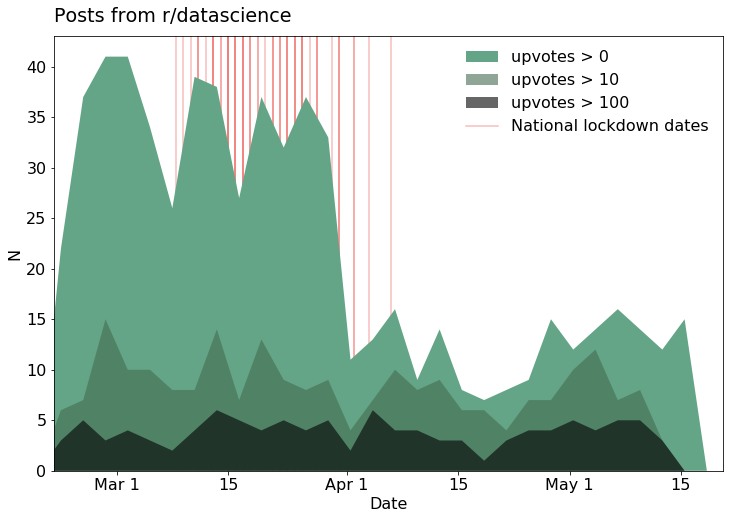

In [3]:
posts = cache.where(subreddit_name, t=None)

f, ax = plot_submission_frequency_histogram(f"Posts from r/{subreddit_name}", posts, upvote_limits=[0, 10, 100])